# Problem Set 2, Amol Surve


## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import scipy.stats
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [149]:
#inputing dataframe
data= pd.read_csv('progresa_sample.csv')
prog=data

In [150]:
#dropping columns which are not required
df = prog.drop(['year', 'folnum', 'village'], axis=1)
#sorting
stats=df.reindex_axis(sorted(df.columns), axis=1)
#getting summary stats
summary=stats.describe()
#transposing 
res=summary.transpose()
#printing mean and standard deviation
res[['mean', 'std']]

/Users/amolsurve/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


For the variable 'progresa', the value '0' indicates the instances that were not given the subsidy - the control group. The value 'basal' indicates the instances that were given the subsidy - the treatment group.

In [151]:
#Subsetting the dataframe to get treatment group
treatment=prog.loc[prog['progresa'] =='basal']
#Poor from treatment group
poorT=treatment.loc[treatment['poor']=='pobre']
poorT=poorT.loc[poorT['year']==97]

In [152]:
#Subsetting the dataframe to get control group
control=prog.loc[prog['progresa'] =='0']
#Poor from control group
poorC=control.loc[control['poor']=='pobre']
poorC=poorC.loc[poorC['year']==97]

In [153]:
#Creating the empty dataframe for the required analysis
table= pd.DataFrame(columns=['Variable name','Average Value (Treatment villages)', 'Average value (Control villages)',
                            'Difference (Treat - Control)', 'p-value'])

#Selecting only the required columns
columns = ['sex', 'grc97','dist_sec','sc','grc','fam_n','min_dist', 'dist_cap','hohedu','hohwag',
           'welfare_index', 'hohsex','hohage','age','sc97']
count=0;

#finding the mean and p-value
for i in sorted(columns):
    t, pv = scipy.stats.ttest_ind(poorT[~np.isnan(poorT[i])][i], poorC[~np.isnan(poorC[i])][i])  
    table.loc[count] = [i, round(np.mean(poorT[i]),4), round(np.mean(poorC[i]),4), 
            round(np.mean(poorT[i]) - np.mean(poorC[i]),4), round(pv,3)]
    count +=1

#Displaying the result
table


,Variable name,Average Value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.7170,10.7420,-0.0250,0.479
1,dist_cap,150.8291,153.7697,-2.9407,0.001
2,dist_sec,2.4531,2.5077,-0.0545,0.036
3,fam_n,7.2813,7.3025,-0.0211,0.427
4,grc,3.5316,3.5430,-0.0115,0.689
5,grc97,3.5316,3.5430,-0.0115,0.689
6,hohage,43.6488,44.2769,-0.6281,0.000
7,hohedu,2.6631,2.5903,0.0728,0.011
8,hohsex,0.9247,0.9229,0.0017,0.571
9,hohwag,544.3395,573.1636,-28.8240,0.000


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A. For 95% confidence interval, then observation for any p-value less than 0.05 is conidered to be statistically significant. Following variables show statistically significant differences:

1. dist_cap - Distance from capital.
2. dist_sec - Distance from secondary school.
3. hohage - Age of the head of household.
4. hohedu - The highest education level of the head of household.
5. hohwag - This shows that the treatment/control have different households when it comes to wages.
6. sex - the sex of the child getting the education.
7. welfare_index - welfare index of the ones in control/treatment group. 

B. Differences in the baselines matter because it might cause the Chance bias. the bias introdiced might change the treatment result that might affect the final outcome. We can take care of it by randomization but again there wont' be any gurantee that the assignment of the treatment and random group will be truely random.

C. If there is a Chance bias, the outcome might be different resulting into decscrepencies in the result of the treatment's impact. In order to get the randomized experiment, multiple regression migt be helpful when performed with fixed effects. Adjusting for baseline differences might help in case of having significant differences in the treatment and control group. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

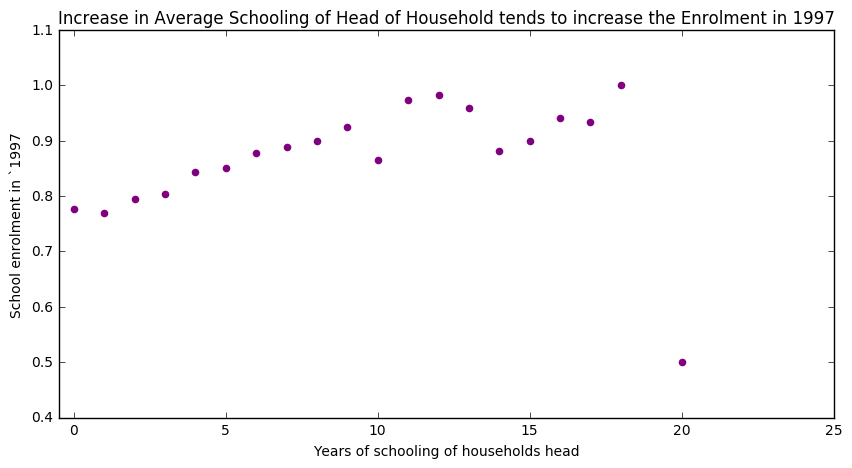

In [154]:
#Considering the dataframe with year 97 and using groupby on 'hihedu' to find the average based on years of education
sctPlot = pd.DataFrame(prog[prog['year'] == 97].groupby('hohedu').mean()['sc'])

# Plotting the graph
plt.figure(figsize=(10,5))
a = plt.scatter(x = sctPlot.index.tolist(), y = sctPlot['sc'], color = 'purple')
plt.xlim(-0.5,25)
plt.xlabel('Years of schooling of households head')
plt.ylabel('School enrolment in `1997')
plt.title('Increase in Average Schooling of Head of Household tends to increase the Enrolment in 1997')
plt.show()

As you can see in the above graph, the increase in the year's pf schooling of the household results into greater number of school enrollments for children. This shows that households with more number of years of education believes in educating their children as well and hence this trend.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

The mean enrollment rate in `97 was: 81.38 %


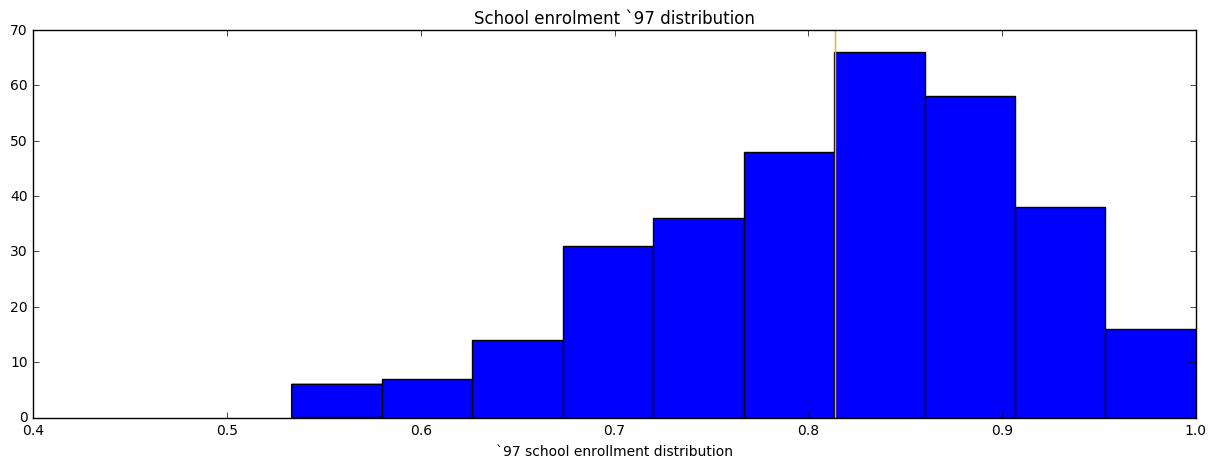

In [155]:
data= pd.read_csv('progresa_sample.csv')
prog=data
# Plotting for year  = 97
plt.figure(figsize=(15,5))

#Subsetting the dataframe to get treatment group
treatment=prog.loc[prog['progresa'] =='basal']
#Poor from treatment group
poorT=treatment.loc[treatment['poor']=='pobre']
poorT=poorT.loc[poorT['year']==97]

# Creting a groupby 'village' table to get mean enrollment rates in villages 
poorT1= poorT.groupby('village').mean()


# Calculating mean enrollment rates
meanrate = np.array(poorT1['sc'])
mean = meanrate.mean()
print("The mean enrollment rate in `97 was:", round(mean*100,2), '%')

# Plotting histogram for year 97
plot = plt.hist(meanrate, bins=10)
plt.axvline(x = mean, color = 'orange')
plt.xlabel('`97 school enrollment distribution')
plt.title('School enrolment `97 distribution')
plt.xlim([0.4,1])
plt.show()



The mean enrollment rate in `98 was: 82.95 %


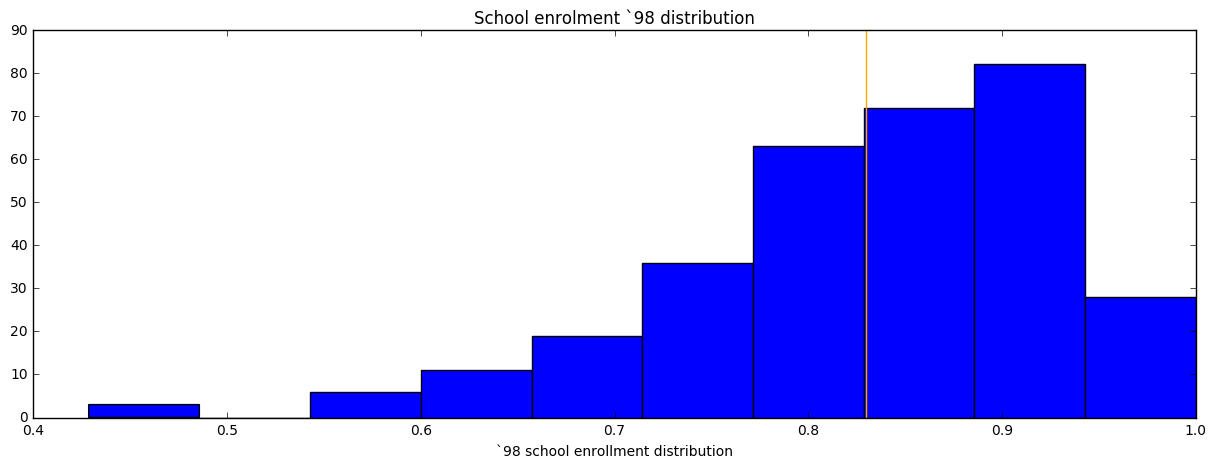

In [156]:
data= pd.read_csv('progresa_sample.csv')
prog=data
# Plotting for year  = 98
plt.figure(figsize=(15,5))

#Subsetting the dataframe to get treatment group
treatment=prog.loc[prog['progresa'] =='basal']
#Poor from treatment group
poorT=treatment.loc[treatment['poor']=='pobre']
poorT=poorT.loc[poorT['year']==98]

# Creting a groupby 'village' table to get mean enrollment rates in villages 
poorT2= poorT.groupby('village').mean()


# Calculating mean enrollment rates
meanrate= np.array(poorT2['sc'])
mean = meanrate.mean()
print("The mean enrollment rate in `98 was:", round(mean*100,2), '%')

# Plotting histogram for year 98
plot = plt.hist(meanrate, bins=10)
plt.axvline(x = mean, color = 'orange')
plt.xlabel('`98 school enrollment distribution')
plt.title('School enrolment `98 distribution')
plt.xlim([0.4,1])
plt.show()



Based on the above histograms for 97 and 98, there is a shift in the enrollment rate. To determine this impact on poor households, we can verify the p-value:

In [157]:
t, p = scipy.stats.ttest_ind( poorT1['sc'], poorT2['sc'], equal_var=True)
print("t-statistic is", t)
print("p-value is", p)

t-statistic is -2.01571348652
p-value is 0.0442487003657


Since, p valus is less than 0.05, we can reject the null hypothesis and conclude that the treatment has significant impact on the outcome.

In [158]:
data= pd.read_csv('progresa_sample.csv')
prog=data
# Subsetting data for the use in histogram plot
df1= prog[prog['poor'] == 'pobre']
df2= df1[df1['year'] == 98]
treatment= df2[df2['progresa'] == 'basal']
treatment.head(5)
control = df2[df2['progresa'] == '0']
control.head(5)

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
5,98,0.0,0.0,4.473,1.0,3.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,9,163,3,2,1.0
185,98,0.0,1.0,1.529,1.0,3.0,5,146.807724,198.916600,pobre,...,0,500.0,637.5,1.0,48.0,10,302,93,2,1.0
187,98,0.0,1.0,1.529,1.0,1.0,5,146.807724,198.916600,pobre,...,0,750.0,530.0,1.0,34.0,7,302,94,0,1.0


## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [166]:
#Sunsetting and finding the mean for treatment and control groups
enrollmentT=treatment['sc'].mean()
enrollmentC=control['sc'].mean()
print(enrollmentT)
print(enrollmentC)
print("Average difference is",enrollmentT-enrollmentC)
#t-test and p value
t, p = scipy.stats.ttest_ind(treatment[~np.isnan(treatment['sc'])]['sc'],
                                        control[~np.isnan(control['sc'])]['sc'])

#Printing results
pd.DataFrame(list([round(t,3), round(p,4)]),
            index = ['T-statistic', 'p-value'], columns = ['Value'])

0.8464791213954308
0.807636956730308
Average difference is 0.0388421646651228


,Value
T-statistic,8.359
p-value,0.000


The average enrollment rate among poor households in the Treatment is 0.8465 villages.
The average enrollment rate among poor households is 0.8076 in the control villages.
The difference is 0.0388.

Results of the single difference are statistically significant since it is < 0.05. Hence, there is an impact of the treatment on the poor household school enrollment rates.


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [160]:
data= pd.read_csv('progresa_sample.csv')
prog=data
# slicing data for regression
dt= prog[(prog['poor'] == 'pobre') & (prog['year'] == 98)][['sc','progresa']]

# Removing NaNs from the dataset
dt = dt[~np.isnan(data['sc'])]

# Running linear regression for sc v/s progresa
model1 = smf.ols(formula = 'sc ~ progresa', data = dt).fit()

# Printing results
print(model1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.003     
Dependent Variable: sc               AIC:                23855.3045
Date:               2017-01-27 14:49 BIC:                23871.7448
No. Observations:   27450            Log-Likelihood:     -11926.   
Df Model:           1                F-statistic:        69.87     
Df Residuals:       27448            Prob (F-statistic): 6.64e-17  
R-squared:          0.003            Scale:              0.13961   
-------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
-------------------------------------------------------------------
Intercept             0.8076   0.0037 220.6758 0.0000 0.8005 0.8148
progresa[T.basal]     0.0388   0.0046   8.3587 0.0000 0.0297 0.0480
-------------------------------------------------------------------
Omnibus:             7638.939      Durbin-Watson:         1.734   

/Users/amolsurve/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* Progresa increased the enrollment rate by 0.0388, thus individuals who received the treatment, were 0.0388 more likely to get enrolled in school where the baseline of enrollment rate was 0.8076 (i.e. enrollment rate when no treatment was given)

How does your regression estimate compare to your t-test estimate from part 2.1?
* We can see that the t-test in our regression model is equal to the t-test that we obtained from the single difference which is 0.0388

Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
* The p-value is < 0.05, hence we can reject the null hypithesis and progressa outcomes have significant effect on poor children's enrollment.

What is the counterfactual assumption underlying this regression?
* "In the absense of treatment, the control group will truly represent the treatment group under no treatment"

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [161]:
#input data
data= pd.read_csv('progresa_sample.csv')
prog=data
#Fitting the model
dt= prog[(prog['poor'] == 'pobre') & (prog['year'] == 98)][['sc','progresa','age','dist_sec','hohedu','sex','welfare_index','indig']]

dt = dt.dropna()

model2 = smf.ols('sc ~ progresa + age + hohedu + dist_sec + sex + indig + welfare_index', data = dt).fit()
print(model2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.267     
Dependent Variable: sc               AIC:                15294.7239
Date:               2017-01-27 14:49 BIC:                15360.4314
No. Observations:   27267            Log-Likelihood:     -7639.4   
Df Model:           7                F-statistic:        1419.     
Df Residuals:       27259            Prob (F-statistic): 0.00      
R-squared:          0.267            Scale:              0.10257   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           1.5025   0.0143 105.3423 0.0000  1.4746  1.5305
progresa[T.basal]   0.0352   0.0040   8.7990 0.0000  0.0274  0.0430
age                -0.0655   0.0007 -95.1046 0.0000 -0.0669 -0.0642
hohedu              0.0085   0.0008  10.9511 0.0000  0.0070  0.010

1.How do the controls affect the point estimate of treatment effect?

Increase in results of the treatments is of 0.0352 compared to the previous rusults of increase which was 0.0388 indicating that some other factors might be responsible for increase in the school enrollment rates.

2.How do the controls affect the standard error on the treatment effect? 

Standard error in simple regression was 0.0046
Standard error in multiple regression now is 0.0040 showing more accuracy in multiple regression outcomes compared to the linear one.

3.How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

1. Standard error is reduced and the effect of treatement is increased in multiple regression model. 
2. Enrollment in multiple regression at baseline condition is higher compared to linear model.
3. Intercept in multiple regression model has increased due to increase in the variables.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [162]:
#input data
data= pd.read_csv('progresa_sample.csv')
prog=data
#subsetting
control97 = prog[(prog['poor'] == 'pobre') & (prog['year'] == 97) & 
                            (prog['progresa'] == '0')]['sc'].mean()

control98 = prog[(prog['poor'] == 'pobre') & (prog['year'] == 98) & 
                            (prog['progresa'] == '0')]['sc'].mean()

treat97 = prog[(prog['poor'] == 'pobre') & (prog['year'] == 97) & 
                            (prog['progresa'] == 'basal')]['sc'].mean()


treat98 = prog[(prog['poor'] == 'pobre') & (prog['year'] == 98) & 
                            (prog['progresa'] == 'basal')]['sc'].mean()

#finding differences
differenceTreat = treat98 - treat97
differenceControl = control98 - control97

print("The double difference of average enrolment is : ", differenceTreat - differenceControl)

dd = pd.DataFrame(columns=['pre', 'post', 'difference'], index=['treat', 'control'])
dd['pre']['treat'] = round(treat97,5)
dd['pre']['control'] = round(control97,5)
dd['post']['treat'] = round(treat98,5)
dd['post']['control'] = round(control98,5)
dd['difference']['treat'] = round(differenceTreat,5)
dd['difference']['control'] = round(differenceControl,5)

print('The double difference table :',
      ' enrollment rates')
dd


The double difference of average enrolment is :  0.031331280319323085
The double difference table :  enrollment rates


,pre,post,difference
treat,0.8227,0.84648,0.02378
control,0.81519,0.80764,-0.00755


### Answer

1. As you can see in the new estimate, there is around 0.031 increase in the enrollment rates of poor household. There is a decrease in the impact of the treatment on enrollment rate due to the consideration of time base effect as the earlier average difference was 0.0388. Hence, the the impact was lower than what was expected earlier as we consider the temporal effects.


2. "Assuming that the change in enrollment rates for treatment and control will follow a parallel trend over the course of time as that of the control group, the treatment group in absense of the treatment will act as a counterfactual to the treatment."

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [163]:
# Subsetting the data to select only 'poor' people
poor = prog[prog['poor'] == 'pobre']
model3 = smf.ols(
    formula = "sc ~ progresa + year + year*progresa + age + hohedu + dist_sec + sex + indig + welfare_index", 
    data = poor).fit()

print(model3.summary2())

                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.278     
Dependent Variable:    sc                AIC:                 33332.1890
Date:                  2017-01-27 14:49  BIC:                 33421.8733
No. Observations:      58013             Log-Likelihood:      -16656.   
Df Model:              9                 F-statistic:         2488.     
Df Residuals:          58003             Prob (F-statistic):  0.00      
R-squared:             0.279             Scale:               0.10399   
------------------------------------------------------------------------
                        Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept              -1.2257   0.4254   -2.8815 0.0040 -2.0594 -0.3920
progresa[T.basal]      -2.9893   0.5390   -5.5464 0.0000 -4.0456 -1.9329
year                    0.0278   0.0044    6.3696 0.0000  0.0192  0.0364

### Answer

* The effects of progresa on the basis of the difference in difference model:

    We can define our model as :

    y = x0 + x1*year + x2*progresa + x3*(year * progresa) + control

    x0 = pre control
    
    x0 + x1 = post control
    
    x0 + x2 = pre treat
    
    x0 + x1 + x2 + x3 = post treat

    The difference of difference: 

    Diff = (x0 + x1 + x2 + x3 - x0 - x2) - (x0 + x1 - x0)
    
    Diff = (x1 + x3) - ( x1)
    
    Diff = x3

    The impact of progresa on the enrollment rate has been an increase of 0.0309 which is the co-efficient of (year * progresa) with a standard error of 0.0055.


* The difference in difference estimate of the increase in enrollment rate due to progresa is 0.0309 which is reduced due to the fact that when the time effects are taken into account, the impact of progresa on the enrollment rate reduces.


* The double difference estimate of progresa on enrollment is lesser in the regression compared to the one obtained in the tabular calculations. The reason might be the involvement of the control variables.

* The counterfactual assumption in this model is that:
"Assuming that the change in enrollment rates for treatment and control over time will follow a parallel trend as that of the control group in absence of treatment, the treatment group will act as a counterfactual to the treatment."

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [164]:
# Subsetting the data to select only 'poor' people
data1 = prog[(prog['year'] == 98)]
# Fitting the regression model
model4 = smf.ols(
    formula = "sc~progresa + poor + poor*progresa + age + hohedu + dist_sec + sex + indig + welfare_index", 
    data = data1).fit()
print(model4.summary2())

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.268     
Dependent Variable:       sc                   AIC:                    18602.6094
Date:                     2017-01-27 14:49     BIC:                    18686.3073
No. Observations:         31882                Log-Likelihood:         -9291.3   
Df Model:                 9                    F-statistic:            1295.     
Df Residuals:             31872                Prob (F-statistic):     0.00      
R-squared:                0.268                Scale:                  0.10490   
---------------------------------------------------------------------------------
                                 Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                        1.4994   0.0176   84.9790 0.0000  1.4648  1.5340
progresa[T.basal]                0.0257  

### Answer

* The effects of progresa on the basis of the difference in difference model:

    We can define our model as :

    y = x0 + x1*year + x2*progresa + x3*(year * progresa) + control

    x0 = pre control
    
    x0 + x1 = post control
    
    x0 + x2 = pre treat
    
    x0 + x1 + x2 + x3 = post treat

    The difference of difference: 

    Diff = (x0 + x1 + x2 + x3 - x0 - x2) - (x0 + x1 - x0)
    
    Diff = (x1 + x3) - ( x1)
    
    Diff = x3

    Hence we can say that in our model, the impact of progresa on the enrollment rate has been an increase of 0.0095 which is the co-efficient of term (poor * progresa) and with a standard error of 0.0106.
    
    Thus, in the year 1998, the people who were poor and had progresa had an increase in the enrollment rate by 0.0095.
    

* The counterfactual in this scenario is:
    "Assuming that the poor people will follow as similar trend as that of the non poor people in the absence of treatment, the poor people without the treatment will act as a true counterfactual for the treatment group."
    

* We can see that here that the impact of progresa on the enrollment rates of poor people increases by 0.0095 as compared to earlier estimate of 0.0309. The intercept is also different.

* Here we assume that our counterfactual are the poor people without treatment effect and that is why our evaluation of impact is based on how the poor behave with respect to the non poor not receiving the treatment.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [165]:
#sunsetting dataframe for non poor people
dataL= prog[prog['poor'] != 'pobre']

#fitting the model
model5 = smf.ols(formula = "sc ~ progresa + age + hohedu + dist_sec + sex + indig + welfare_index", data = dataL).fit()
#printing summary
print(model5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.281    
Dependent Variable: sc               AIC:                7396.7188
Date:               2017-01-27 14:49 BIC:                7454.6644
No. Observations:   10334            Log-Likelihood:     -3690.4  
Df Model:           7                F-statistic:        577.3    
Df Residuals:       10326            Prob (F-statistic): 0.00     
R-squared:          0.281            Scale:              0.11969  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          1.4609   0.0293  49.8328 0.0000  1.4034  1.5183
progresa[T.basal]  0.0267   0.0070   3.8311 0.0001  0.0130  0.0404
age               -0.0677   0.0011 -59.5577 0.0000 -0.0700 -0.0655
hohedu             0.0094   0.0011   8.6815 0.0000  0.0073  0.0116
dist_sec     

## Explanation:

The impact of progresa on the enrollment rates of the children in the treatment villages is analyzed here showing some spillover effect that resulted into higher level of enrollment amongst non-poor people from the treatment village v/s non treatment villages,based on single difference regression analysis. The possible reason can be the psychological effect called peer-pressure. To elaborate on that, children from non-poor family must be in the same schools as that of the students in poor family and seeing students from poor family going to the school more, might have caused students from non-poor family to do the same and hence, there is an increase. 

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

We can assume that the impact of Progresa on the enrollment rate has been causal since, we have seen significant impact on the treatment villages compared to the control villages, considering all the fixed effects and baseline changes. We can causally imply that the treatment caused a significant increase in the enrollment rates, without considering the effects of the uncertain variable effects. 